Primero importaremos los datos del csv y con la función shape revisaremos el tamaño de la base de datos, como a su vez imprimiremos los 15 primeros datos con la función head(15)

In [71]:
import pandas as pd
datos=pd.read_csv("A1.3-NASA.csv")
print("Dimensiones:", datos.shape)
print(datos.head(15))

Dimensiones: (1503, 6)
    frecuencia  angulo  longitud  velocidad   espesor  presion
0          800     0.0    0.3048       71.3  0.002663  126.201
1         1000     0.0    0.3048       71.3  0.002663  125.201
2         1250     0.0    0.3048       71.3  0.002663  125.951
3         1600     0.0    0.3048       71.3  0.002663  127.591
4         2000     0.0    0.3048       71.3  0.002663  127.461
5         2500     0.0    0.3048       71.3  0.002663  125.571
6         3150     0.0    0.3048       71.3  0.002663  125.201
7         4000     0.0    0.3048       71.3  0.002663  123.061
8         5000     0.0    0.3048       71.3  0.002663  121.301
9         6300     0.0    0.3048       71.3  0.002663  119.541
10        8000     0.0    0.3048       71.3  0.002663  117.151
11       10000     0.0    0.3048       71.3  0.002663  115.391
12       12500     0.0    0.3048       71.3  0.002663  112.241
13       16000     0.0    0.3048       71.3  0.002663  108.721
14         500     0.0    0.3048

Llamamos a la función train_test_split a través de la librería sklearn.model y guardado los datos en las variables train y test respectivamente donde guardaremos los datos de entrenamiento y pruebas en una proporción de 70/30 asi usaremos la función anteriormente llamada y la separaremos en datos y en el tamaño del entrenamiento que queremos que en este caso será de 0.7

Después imprimiremos los datos de train y test con el comando shape e imprimiremos los 10 primeros números aleatorios que nos salgan.


In [72]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(datos, train_size = 0.7)

print("Entrenamiento:", train.shape)
print("Pruebas:",test.shape)
print(train.head(10))

Entrenamiento: (1052, 6)
Pruebas: (451, 6)
      frecuencia  angulo  longitud  velocidad   espesor  presion
653         1250     9.9    0.1524       55.5  0.020844  121.635
539        10000     2.7    0.1524       39.6  0.002948  112.589
1444         400    12.3    0.1016       39.6  0.040827  128.265
947         4000    19.7    0.0508       71.3  0.034118  113.045
831          500     8.4    0.0508       31.7  0.005808  122.966
654         1600     9.9    0.1524       55.5  0.020844  119.875
404         5000     7.3    0.2286       71.3  0.010440  115.298
634          630     9.9    0.1524       71.3  0.019300  129.889
826         2000     8.4    0.0508       39.6  0.005662  129.965
25          6300     0.0    0.3048       55.5  0.002831  117.976


Importaremos la librería statsmodels el cual nos deja usar comando de regresión lineal multiple y simple como el comando OLS()
Después eliminamos la columna de presión gracias al axis=1 y al comando drop de nuestra base de entrenamiento para X y en a Y se la asignamos.

A este modelo OLS le agregamos el sm.add_constanr(X) para asegurarnos qué se muestren todos los datos. A su vez con el método fit() estimamos el valor de cada coeficiente y los imprimiremos con el summary() y también le pediremos que nos muestre el valor mas exacto de cada pvalue

In [78]:
import statsmodels.api as sm

X_train = train.drop('presion', axis=1)
Y_train = train.presion

X_train_sm = sm.add_constant(X_train)

modelo = sm.OLS(Y_train, X_train_sm).fit()

print(modelo.summary())
print("\nP-values exactos:\n", modelo.pvalues)

                            OLS Regression Results                            
Dep. Variable:                presion   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     218.9
Date:                Wed, 20 Aug 2025   Prob (F-statistic):          7.22e-160
Time:                        19:54:46   Log-Likelihood:                -3152.5
No. Observations:                1052   AIC:                             6317.
Df Residuals:                    1046   BIC:                             6347.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        132.1503      0.663    199.387      0.0

4. A partir de los resultados mostrados en la tabla, indica si consideras que existe al menos
una variable significativa en el modelo. Adicionalmente, indica específicamente cuál o
cuáles variables específicas tienen una asociación lineal significativa con la salida y cuál
considerarías que es la variable más importante del modelo. Imprime en consola cada una de estas aseveraciones como texto, pero indica claramente en qué métrica te estás
basando para llegar a cada conclusión.

In [70]:
print("Si hay almenos una variable significativa esto pues todos los pvalues salieron muy menores a 0.05, lo que indica que si hay variables significativas.")
print("Yo considero que todas las variables son significativas por lo antes mencionado como la frecuencia, ángulo, longitud, velocidad y espesor.")
print("De entre todas estas la que considero mas significativa es la de la frecuencia, puesto a que es la mas chiquita y le menos significativa")
print("sería el espesor a ser la mas grande, pero de igual forma muy chiquita a comparación a un 0.05")

Si hay almenos una variable significativa esto pues todos los pvalues salieron muy menores a 0.05, lo que indica que si hay variables significativas.
Yo considero que todas las variables son significativas por lo antes mencionado como la frecuencia, ángulo, longitud, velocidad y espesor.
De entre todas estas la que considero mas significativa es la de la frecuencia, puesto a que es la mas chiquita y le menos significativa
 sería el espesor a ser la mas grande, pero de igual forma muy chiquita a comparación a un 0.05


Importamos la librería de numpy para poder usar las funciones cuadráticas y a su vez ahora volvemos a importar el sklearn.metrics pero ahora para el MSE y el R².
Después con la función sqrt() y el scale de numpy podemos sacar de forma mas rápida el RSE. Con el resultado del modelo de entrenamiento y el rsquared obtenemos el R² de entrenamiento.

Ahora para los de validación quitamos la variable de 'presión' tanto en X como en Y y los volvemos a cargar a un modelos con el sm y el comando add_contant() y a su vez todo a eso a un metodo predict para estimar el valor Y a partir de los coeficientes estimados del modelo.
Para finalizar repetimos el proceso de RSE y R² para estos nuevos datos validados


In [57]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

rse_train = np.sqrt(results.scale)
r2_train = results.rsquared

X_test = test.drop('presion', axis = 1)
y_test = test.presion

X_test_sm = sm.add_constant(X_test)
y_val = results.predict(X_test_sm)

rse_test = np.sqrt(mean_squared_error(y_test, y_val))
r2_test = r2_score(y_test, y_val)

print("Entrenamiento \n RSE:", rse_train, "  R²:", r2_train)
print("\nValidación\n RSE:", rse_test, "  R²:", r2_test)

Entrenamiento 
 RSE: 4.771445516103311   R²: 0.5183750875649376

Validación
 RSE: 4.906237724712244   R²: 0.5060918128344808


Ponemos la libreria matplotlib para poder grafiicar. Primero lo graficamos con scatter() y de eje X ponemos el y_test y de Y el y_val para ver como se comporta lo que predecimos contra lo real.
A su vez graficamos con plot() en el ej y el minimo y maximo del y_test y hacemos

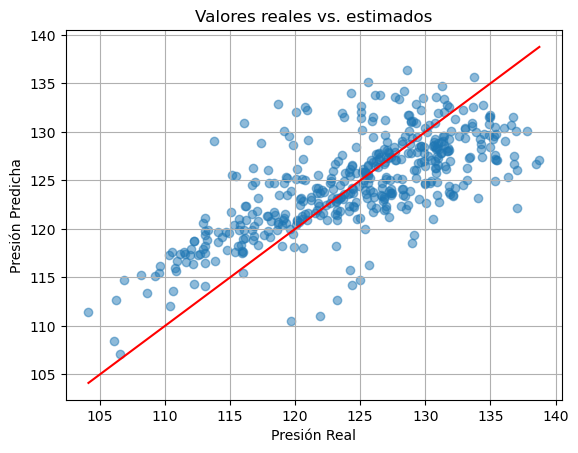

In [66]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_val, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r")

plt.xlabel("Presión Real")
plt.ylabel("Presión Predicha")
plt.title("Valores reales vs. estimados")
plt.grid(True)
plt.show()

Como podemos observar la linea roja representa que la relación entre el valor real y el valor predicho, si esta fuera de un angulo de 45° y aunque parezca gracias a la cuadratica, realmente no esta completamente centrada, ya que los valores de RSE y R^2 aunque parecido no son exctameente identicos.
De igual manera viendo los datos si se pasa muy cerca de la mayoria de los datos y donde se agrupan más si estan tocando a casi todos, por lo que podemos concluir que realmente la regresion lineal fue acertada.